In [71]:
# IMPORT ALL LIBRARY
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error


In [72]:
# read and Understand data
bf = pd.read_csv(r"C:\Users\abc\Downloads\day.csv")
bf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
#Determining the number of rows and columns
bf.shape


(730, 16)

In [74]:
#summary of all the numeric columns in the dataset
bf.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [75]:
#Datatypes of each column
bf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [76]:
#Checking missing values
bf.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
#Rename the columns for better understanding
bf.rename(columns = {'dteday':'date','yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bf.head()

,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [78]:
#Mapping variables season, month, weathersit, weekday

bf['season']=bf.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bf['month']=bf.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bf['weathersit']=bf.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bf['weekday']=bf.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bf.head()

,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
bf.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
date          730
dtype: int64

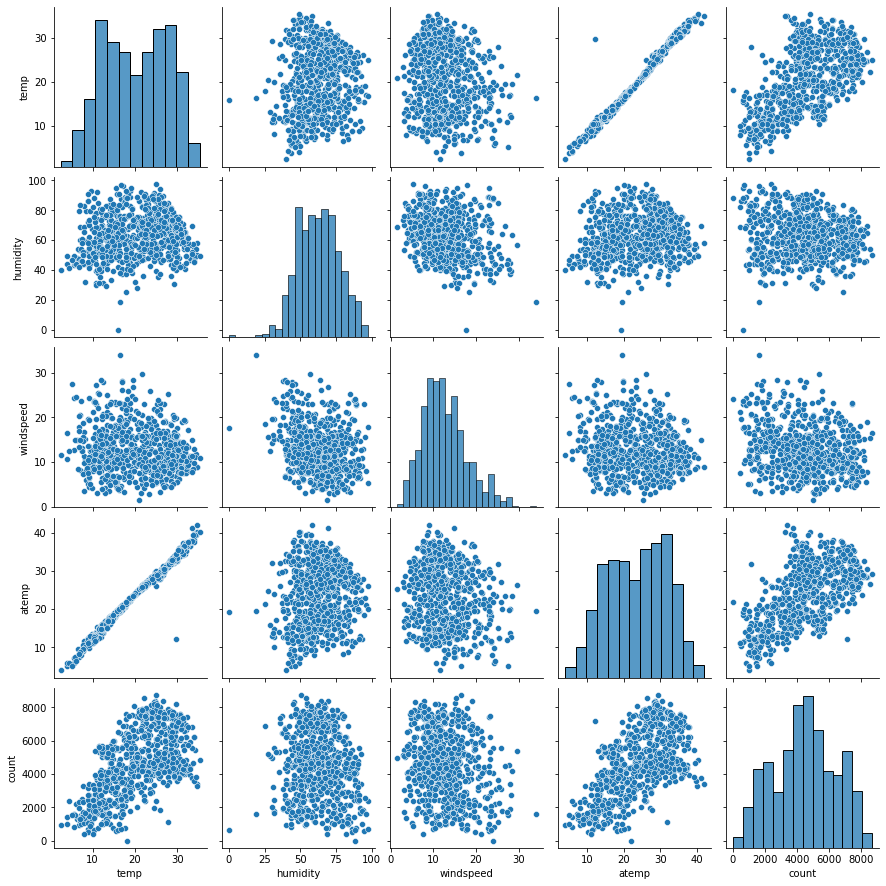

In [80]:
#Pairplot for numeric variables
sns.pairplot(bf, vars=["temp", "humidity",'windspeed','atemp','count'])
plt.show()


In [81]:
bf


,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Thu,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,Dec,0,Sat,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


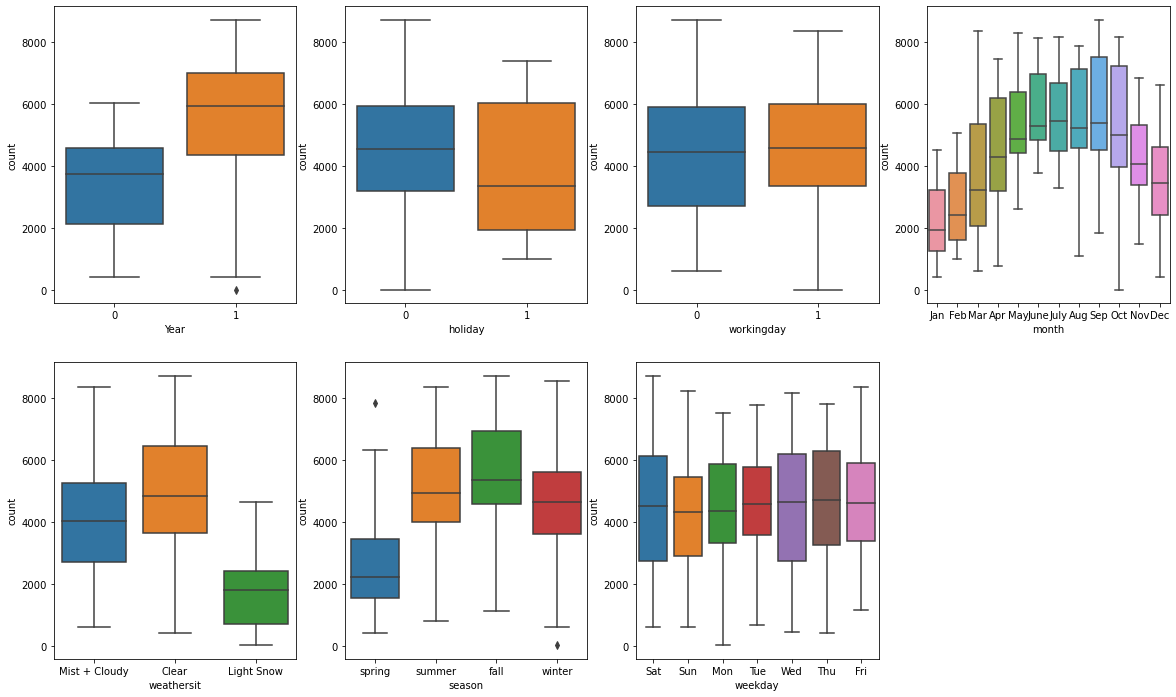

In [82]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bf)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bf)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bf)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bf)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bf)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bf)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bf)
plt.show()


In [83]:
bf


,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Thu,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,Dec,0,Sat,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [84]:
bf.columns


Index(['instant', 'date', 'season', 'Year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


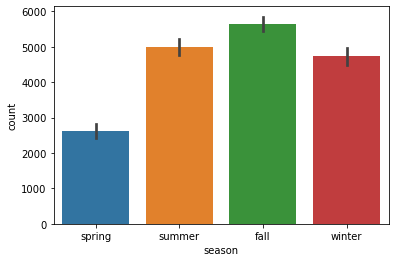

In [85]:


sns.barplot('season','count',data=bf)
plt.show()




C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


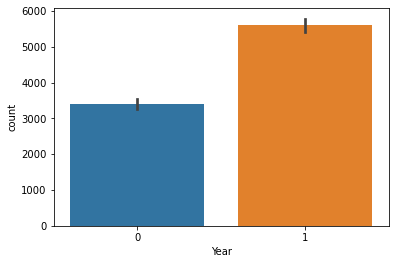

In [86]:
sns.barplot('Year','count',data=bf)
plt.show()



C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


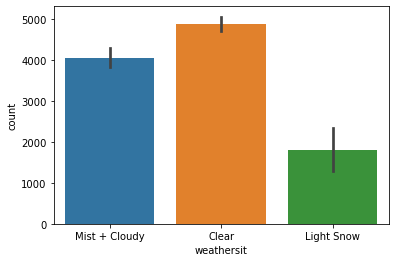

In [87]:
sns.barplot('weathersit','count',data=bf)
plt.show()


C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


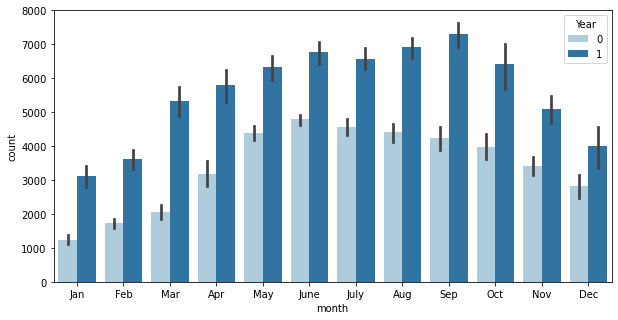

In [88]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=bf,palette='Paired')
plt.show()


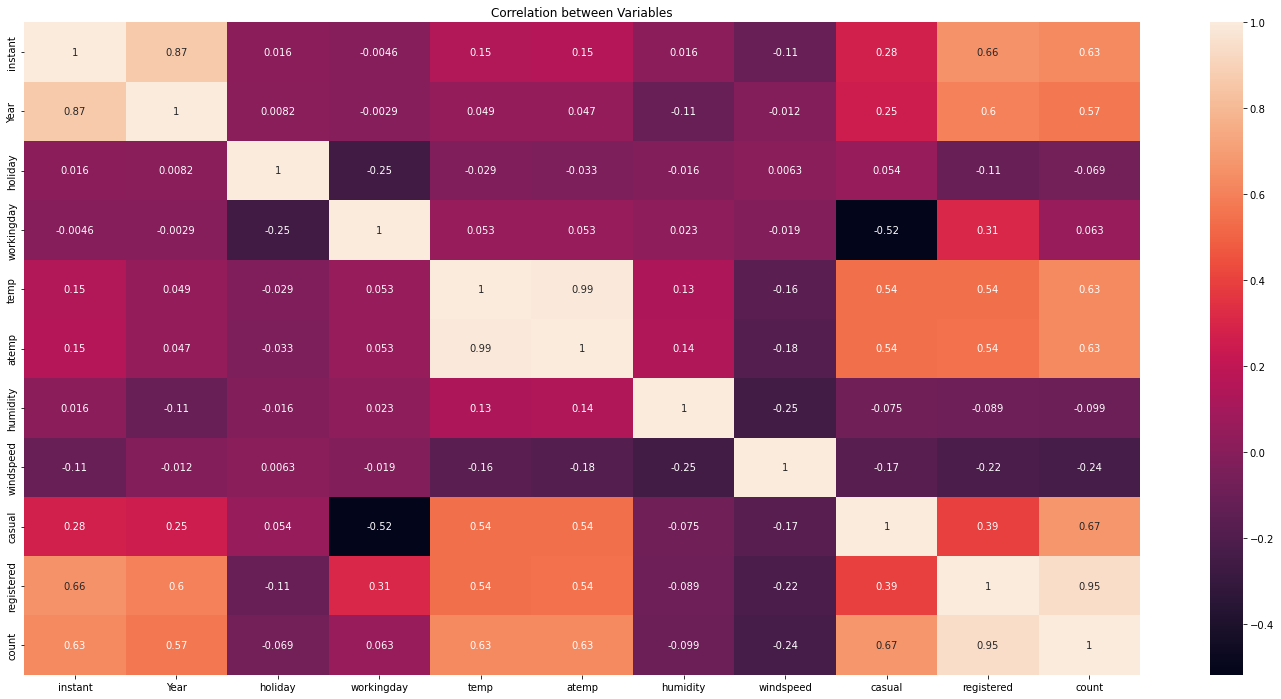

In [89]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bf.corr(),annot = True)
plt.title("Correlation between Variables")
plt.show()

In [90]:
bf



,instant,date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Thu,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,Dec,0,Sat,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [91]:
#drop unnecessary columns
bf=bf.drop(['instant','date','casual', 'registered','atemp'], axis=1)
bf.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [92]:
bf.shape



(730, 11)

In [93]:
bf.columns


Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [62]:
bf.shape




(730, 11)

In [63]:
 # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bf.season,drop_first=True)
months=pd.get_dummies(bf.month,drop_first=True)
weekdays=pd.get_dummies(bf.weekday,drop_first=True)
weather_sit=pd.get_dummies(bf.weathersit,drop_first=True)
seasons=pd.get_dummies(bf.season,drop_first=True)


In [64]:
# Add the results to the original bike dataframe
bf=pd.concat([months,weekdays,weather_sit,seasons,bf],axis=1)
bf.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [65]:
bf.shape


(730, 33)

In [66]:
bf.columns


Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'season', 'Year',
       'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [67]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bf.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bf.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [80]:
bf.shape


(730, 29)

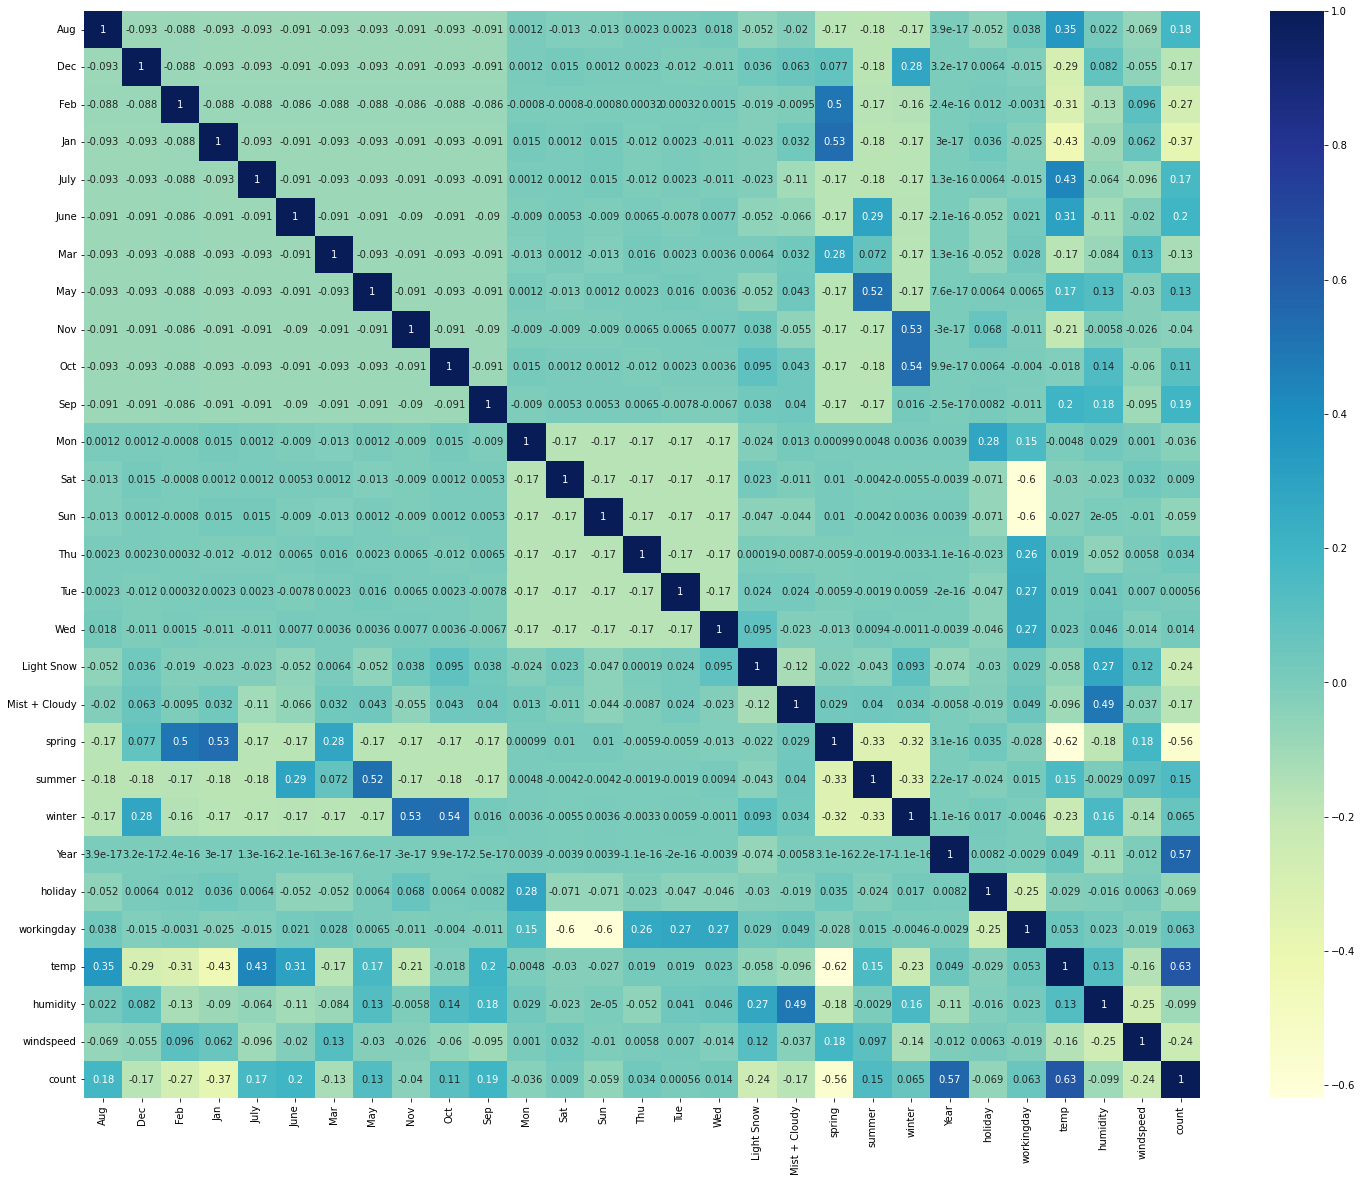

In [82]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bf.corr(), annot = True,cmap="YlGnBu")
plt.show()


In [90]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
bf_train, bf_test = train_test_split(bf, train_size = 0.7, random_state = 100)



In [91]:
bf_train


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,29.246653,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,16.980847,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,10.489153,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,15.443347,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,13.803347,72.9583,14.707907,1683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,30.852500,65.9583,8.666718,7261
53,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,9.091299,42.3043,6.305571,1917
350,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,10.591653,56.0833,16.292189,2739
79,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,17.647835,73.7391,19.348461,2077


In [92]:
bf_test


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,29.793347,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,19.270000,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,29.315000,30.5000,19.583229,4968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,19.509153,73.3750,11.666643,6606
127,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,21.661653,63.1667,5.000712,4333
640,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,26.957500,79.3750,4.458569,7572
72,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,13.333897,49.6957,9.174042,2046


In [93]:
bf_train.shape


(510, 29)

In [94]:
bf_test.shape


(220, 29)

In [96]:
from sklearn.preprocessing import MinMaxScaler


In [99]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bf_train[num_vars] = scaler.fit_transform(bf_train[num_vars])
bf_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [100]:
bf_train.describe()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


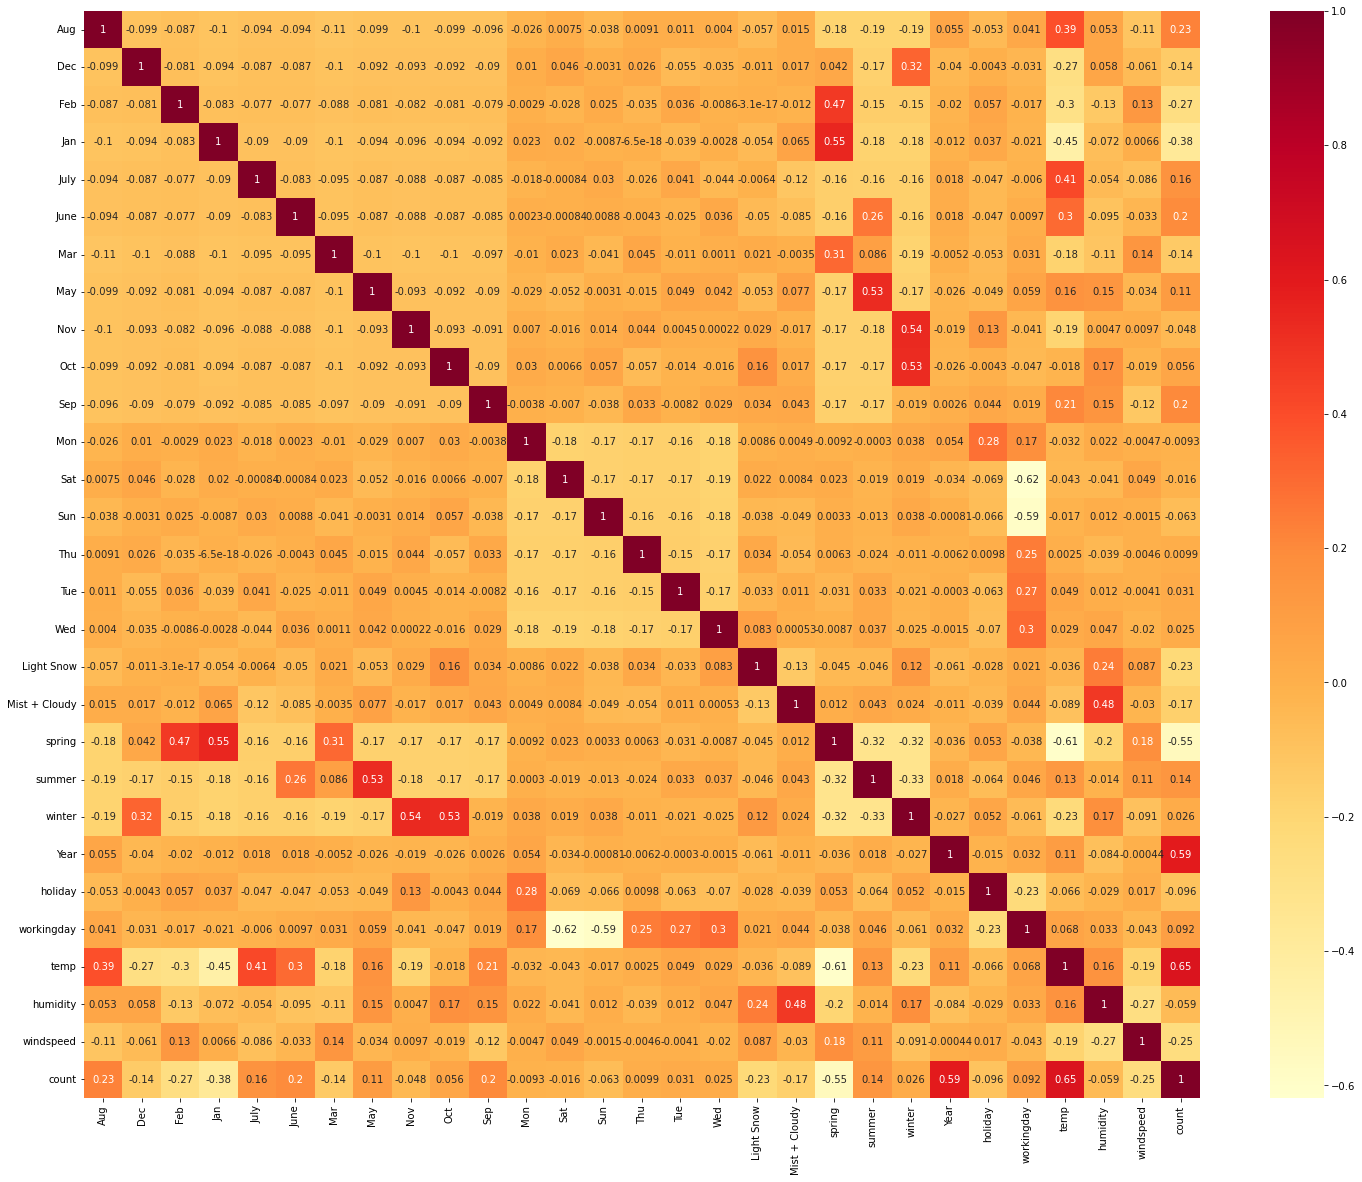

In [101]:
plt.figure(figsize=(25, 20))
sns.heatmap(bf_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [102]:
#Divide the data into X and y
y_train = bf_train.pop('count')
X_train = bf_train

In [103]:
y_train


576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: count, Length: 510, dtype: float64

In [104]:
X_train


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0.462664,0.759870,0.529881


In [69]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)



NameError: name 'X_train' is not defined

In [124]:

rfe = RFE(lm, n_features_to_select=15, step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)



In [125]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [126]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col


Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [127]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]


Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [128]:
 #Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [129]:
X_train_rfe


,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
576,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,1,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,1,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,0,0,0,0,0,0,1,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,0,1,0,1,0,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,1,0,1,0,0,0,1,0.462664,0.759870,0.529881


In [130]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [131]:
X_train_rfe


,const,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
576,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,1,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,1,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0.202618,0.435939,0.111379
350,1.0,0,0,0,1,0,1,0,0,1,0,0,0,0.248216,0.577930,0.431816
79,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0.462664,0.759870,0.529881


In [132]:
 #Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()


In [175]:
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          4.22e-191
Time:                        15:59:04   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
Year              0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
humidity         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
X_train_rfe.columns



Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
5,Mist + Cloudy,2.29
9,Year,2.09
3,Sat,1.98


In [190]:
X_train_new1 = X_train_rfe.drop(["Jan",'July','humidity','windspeed',"temp"], axis = 1)








In [192]:
X_train_lm6= sm.add_constant(X_train_new1)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     152.5
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          9.78e-145
Time:                        16:12:17   Log-Likelihood:                 396.01
No. Observations:                 510   AIC:                            -770.0
Df Residuals:                     499   BIC:                            -723.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4915      0.017     28.258

In [193]:
X_train_lm6



,const,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday
576,1.0,0,0,0,0,0,0,0,1,0,1
426,1.0,0,1,0,1,1,0,0,1,0,0
728,1.0,0,0,0,0,1,0,0,1,0,0
482,1.0,0,1,0,1,0,1,0,1,0,0
111,1.0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,0,1
53,1.0,0,0,0,0,1,0,0,0,0,1
350,1.0,0,1,0,1,0,0,1,0,0,0
79,1.0,0,0,0,1,0,1,0,0,0,1


In [194]:
#y train predicted
y_train_pred = lm6.predict(X_train_lm6)




In [195]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

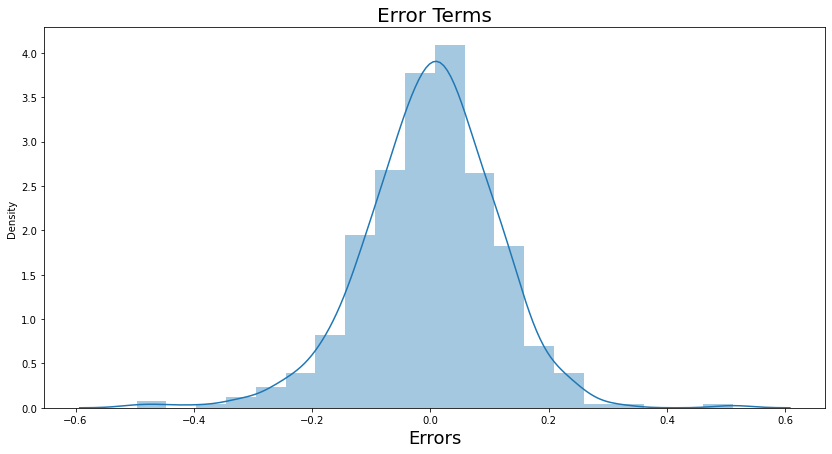

In [196]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()


In [199]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bf_test[num_vars] = scaler.transform(bf_test[num_vars])
bf_test.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [200]:
#Dividing into X_test and y_test
y_test = bf_test.pop('count')
X_test = bf_test
X_test.describe()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [201]:
#Columns
X_train_new1.columns


Index(['Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'holiday', 'workingday'],
      dtype='object')

In [202]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new2= sm.add_constant(X_test_new)
X_test_new2.head()


,const,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday
184,1.0,0,0,0,1,0,0,0,0,1,0
535,1.0,0,0,0,0,0,1,0,1,0,1
299,1.0,0,0,0,1,0,0,1,0,0,1
221,1.0,0,0,0,0,0,0,0,0,0,1
152,1.0,0,0,0,0,0,1,0,0,0,1


In [205]:
# Making predictions
y_pred = lm6.predict(X_test_new2)



In [206]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7517243231120807

In [207]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.751724)*(11-1)/(11-1-1)
print(Adj_r2)


0.7241377777777778


Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

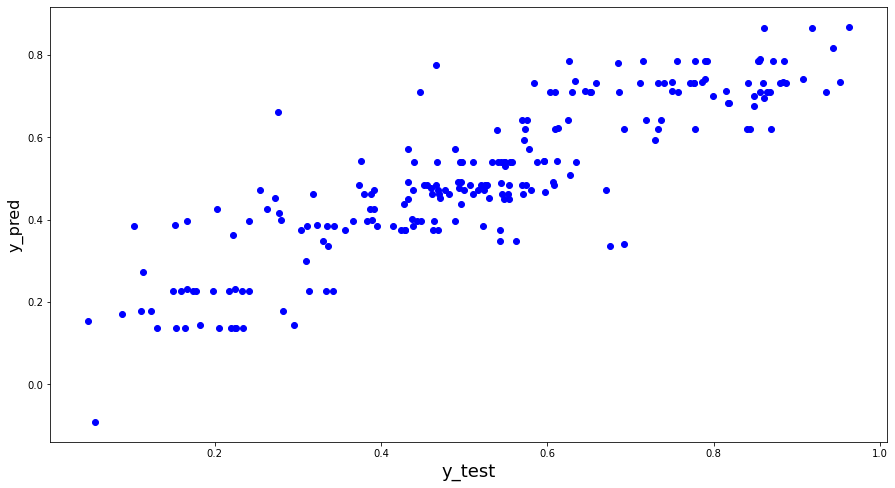

In [208]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      


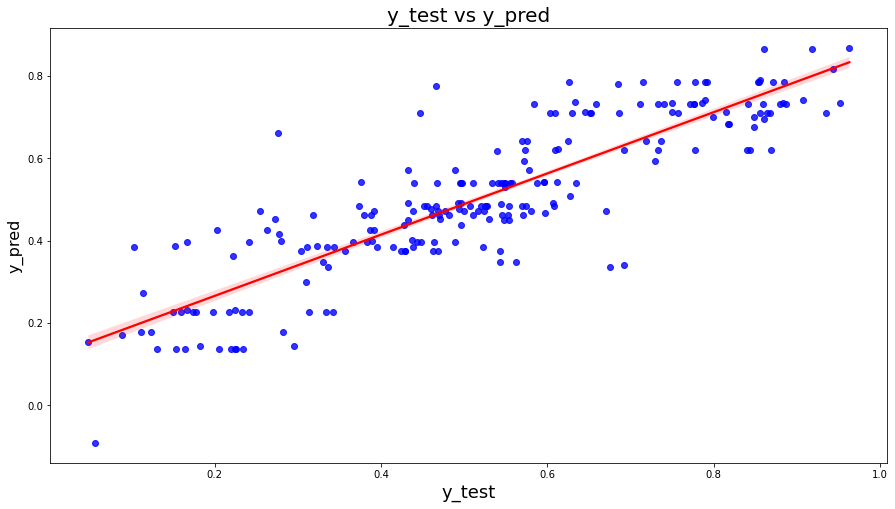

In [209]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()
